<a href="https://colab.research.google.com/github/takemyt1me/ML_practice/blob/main/Titanic_MLpractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=2.5)
import missingno as msno #Null data visualization

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Data checking

In [2]:
df_train = pd.read_csv('/content/drive/MyDrive/Titanic_dataset/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Titanic_dataset/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Null data check

In [4]:
for col in df_train.columns:
  msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 *df_train[col].isnull().sum() / df_train[col].shape[0])
  print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [5]:
for col in df_test.columns:
  msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*df_test[col].isnull().sum()/df_train[col].shape[0])
  print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


<Axes: >

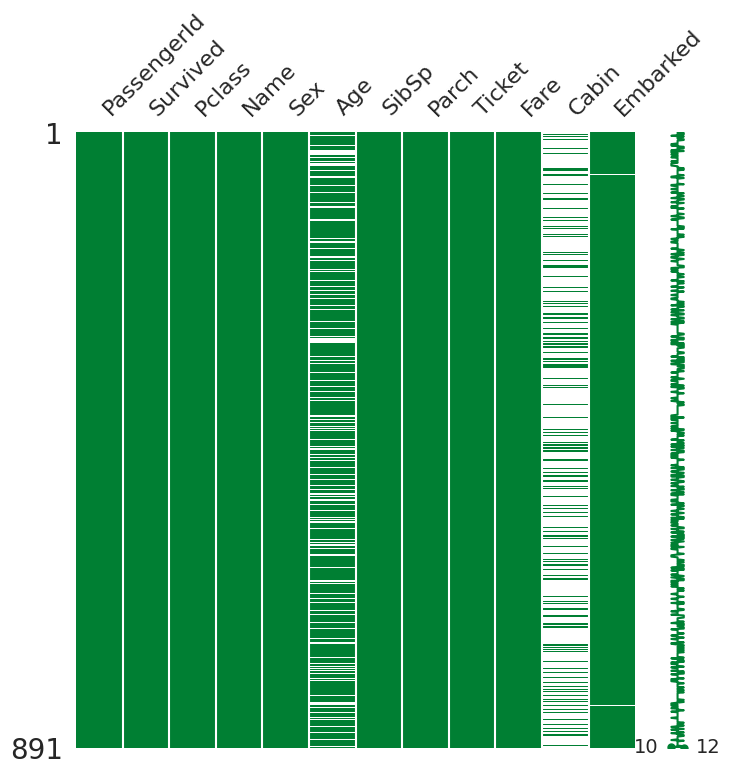

In [6]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.0, 0.5, 0.2))

Target label check

Text(0.5, 1.0, 'Count Plot - Survived')

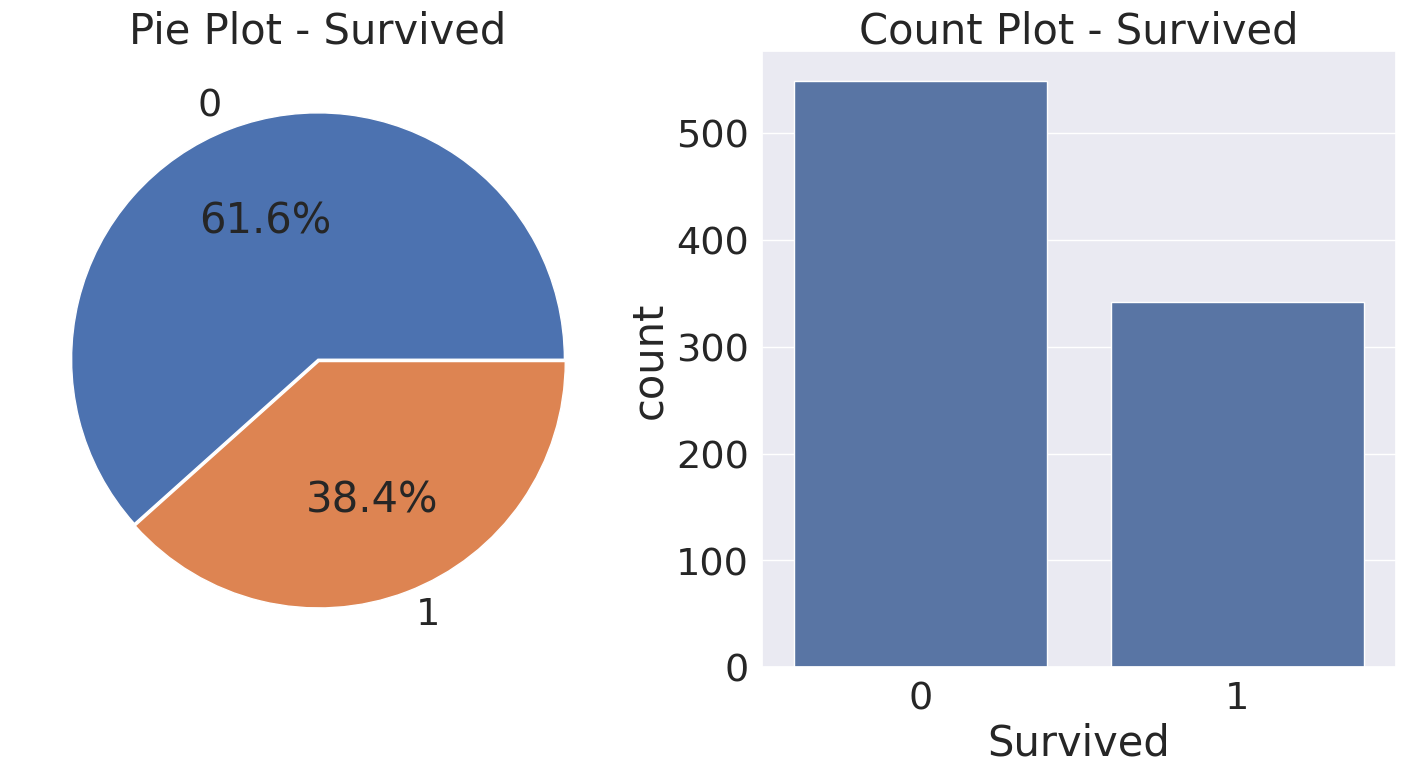

In [7]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) #Set graph as 1x2

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.01], autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Pie Plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x ='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count Plot - Survived')

Pcalss

In [8]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [9]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [10]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

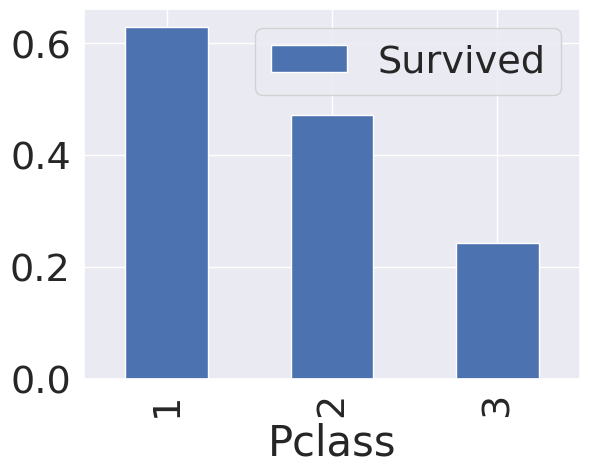

In [11]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().sort_values(by='Survived', ascending=False).plot.bar()

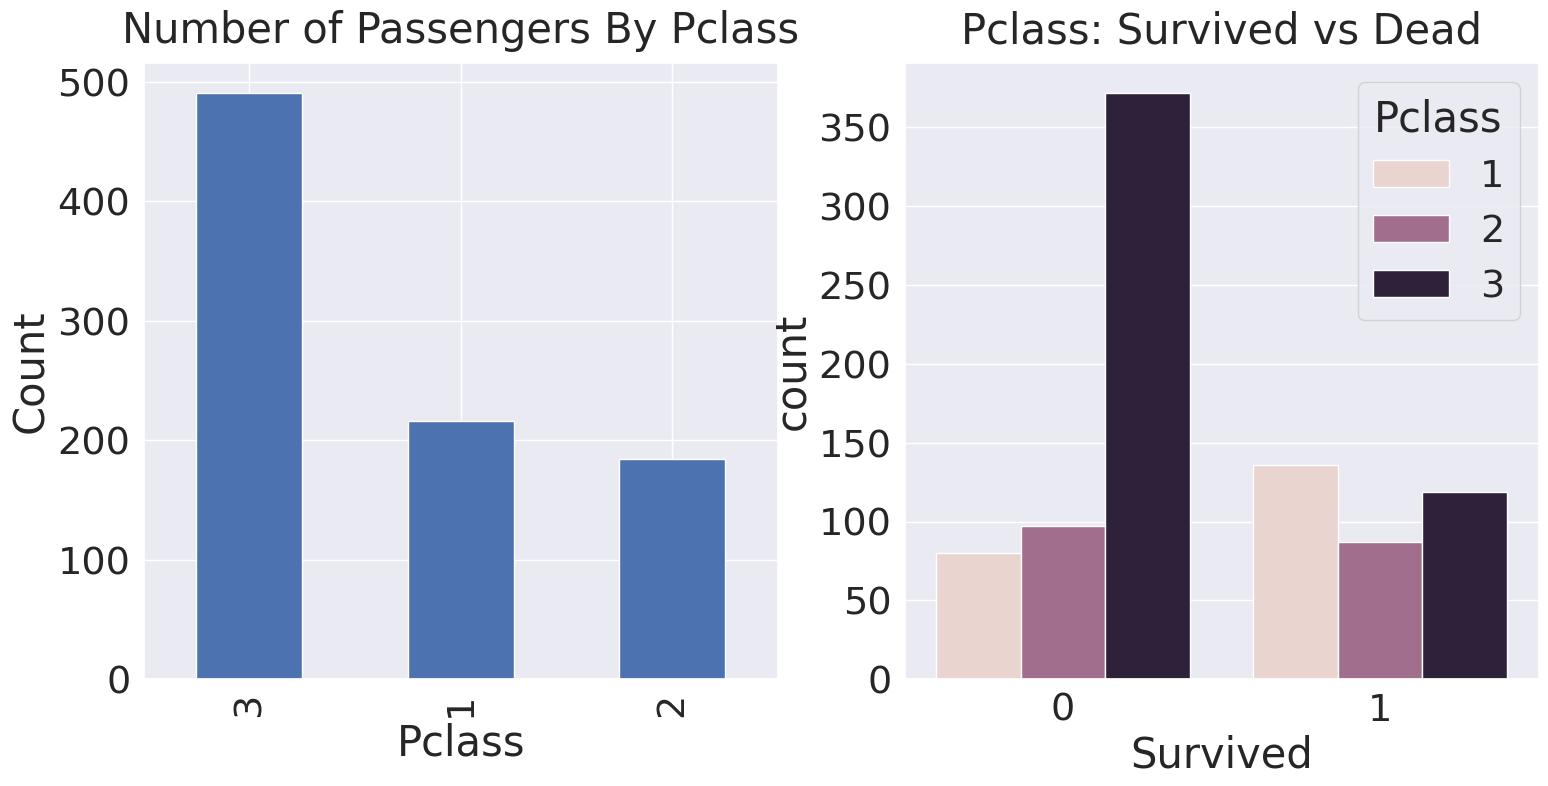

In [12]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().sort_values(ascending=False).plot.bar(ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Survived', hue='Pclass', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

Sex

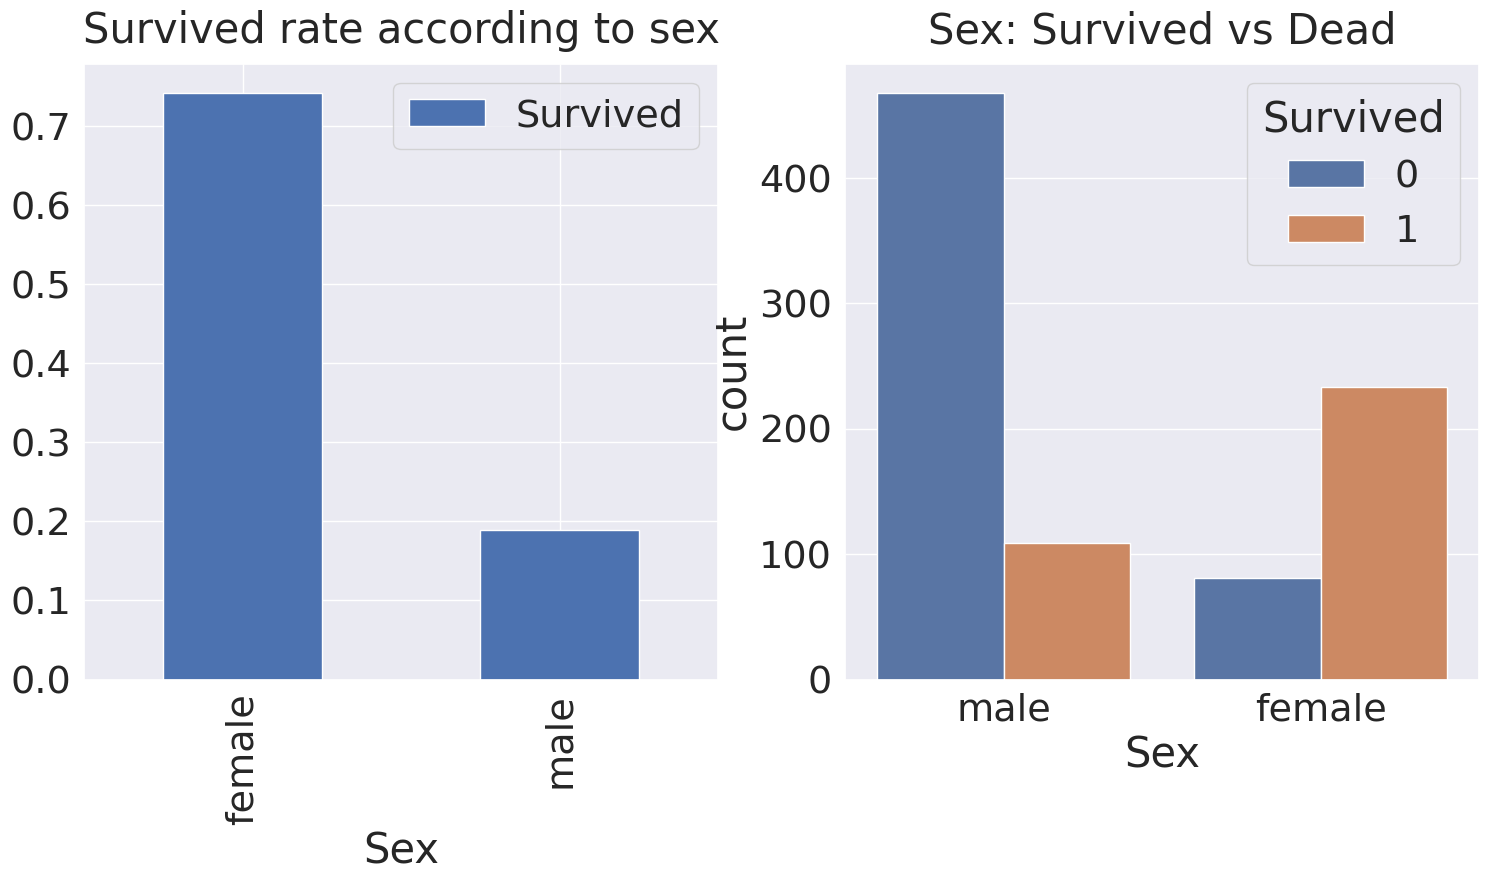

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived rate according to sex', y = 1.02)
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead', y=1.02)
plt.show()

In [14]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [15]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Both Sex and Pclass

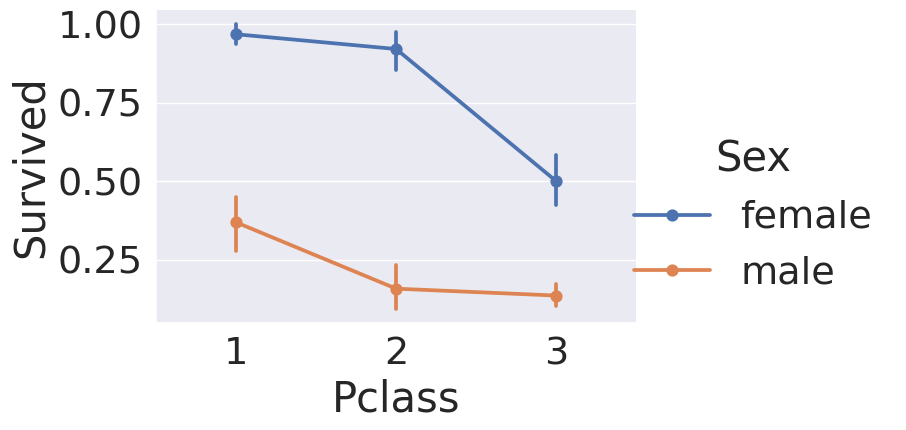

In [16]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind ='point', data=df_train, aspect = 1.5)

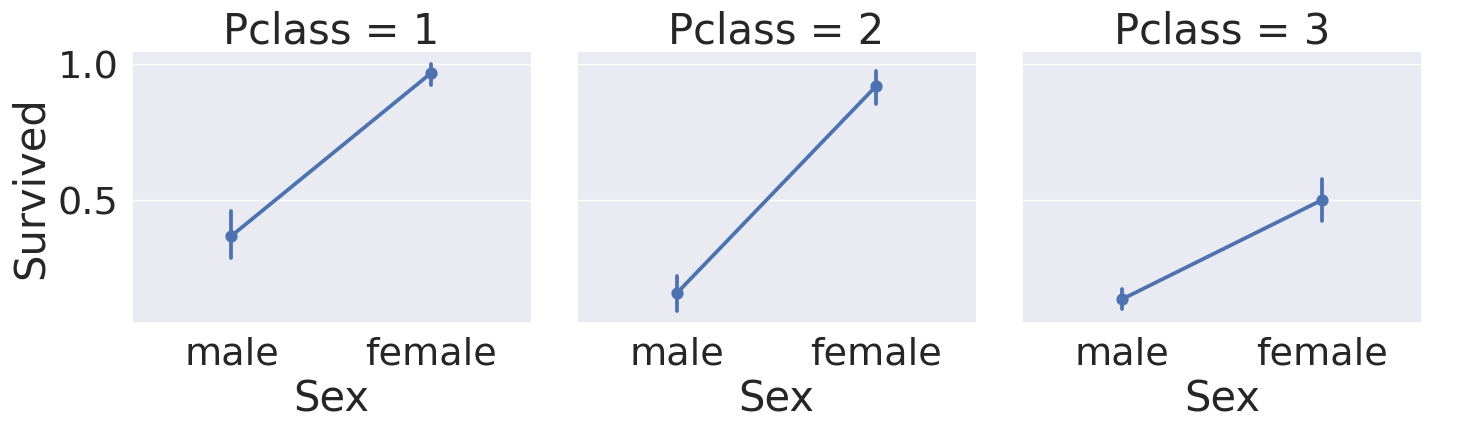

In [17]:
sns.catplot(x='Sex', y='Survived', col = 'Pclass', kind = 'point', data=df_train, aspect = 1)

Age

In [18]:
print('Oldest Passenger: {:.1f} Years'.format(df_train['Age'].max()))
print('Youngest Passenger: {:.1f} Years'.format(df_train['Age'].min()))
print('Average Passenger age: {:.1f} Years'.format(df_train['Age'].mean()))

Oldest Passenger: 80.0 Years
Youngest Passenger: 0.4 Years
Average Passenger age: 29.7 Years


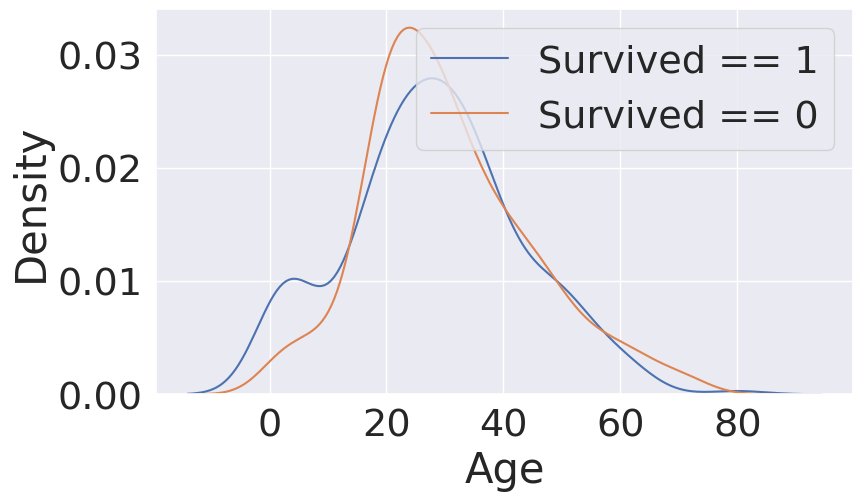

In [19]:
f, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax) #Select Survived == 1 people in column
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

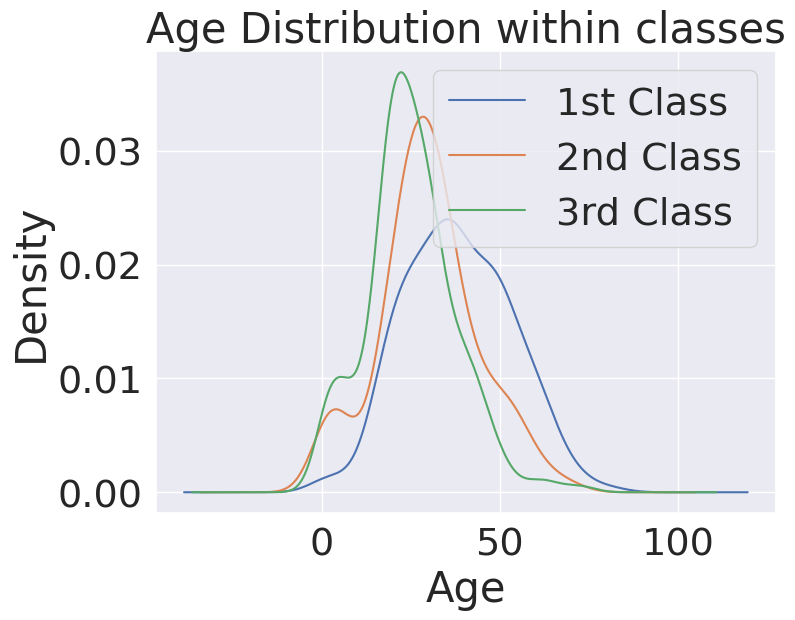

In [20]:
plt.figure(figsize=(8, 6))
df_train[df_train['Pclass'] == 1]['Age'].plot(kind='kde')
df_train[df_train['Pclass'] == 2]['Age'].plot(kind='kde')
df_train[df_train['Pclass'] == 3]['Age'].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

Text(0.5, 1.02, 'Pclass =1, Age distribution')

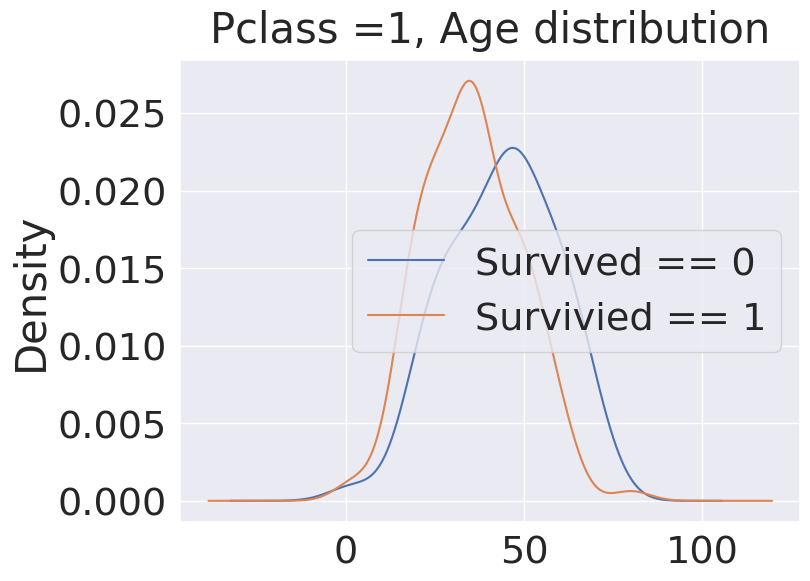

In [21]:
plt.figure(figsize=(8, 6))
df_train[(df_train['Survived']==0) & (df_train['Pclass']==1)]['Age'].plot(kind='kde')
df_train[(df_train['Survived']==1) & (df_train['Pclass']==1)]['Age'].plot(kind='kde')
plt.legend(['Survived == 0', 'Survivied == 1'])
plt.title('Pclass =1, Age distribution', y = 1.02)

Text(0.5, 1.02, 'Pclass =2, Age distribution')

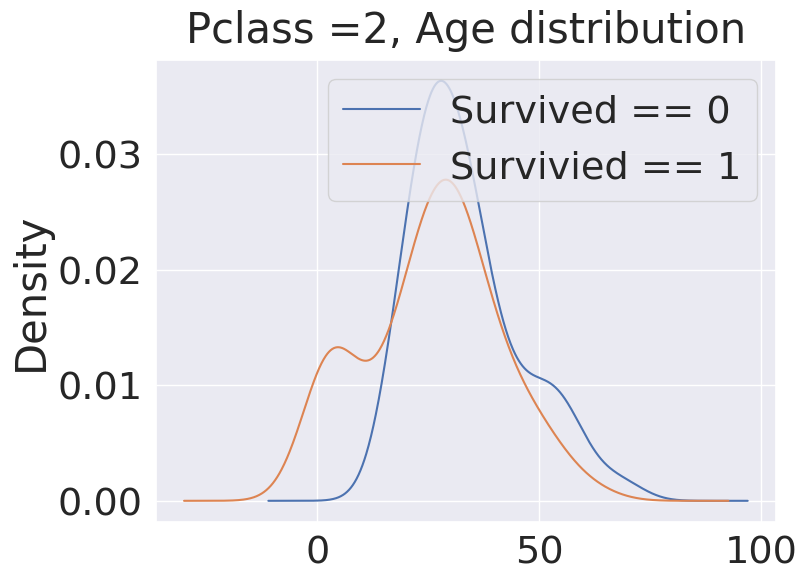

In [22]:
plt.figure(figsize=(8, 6))
df_train[(df_train['Survived']==0) & (df_train['Pclass']==2)]['Age'].plot(kind='kde')
df_train[(df_train['Survived']==1) & (df_train['Pclass']==2)]['Age'].plot(kind='kde')
plt.legend(['Survived == 0', 'Survivied == 1'])
plt.title('Pclass =2, Age distribution', y = 1.02)

Text(0.5, 1.02, 'Pclass =3, Age distribution')

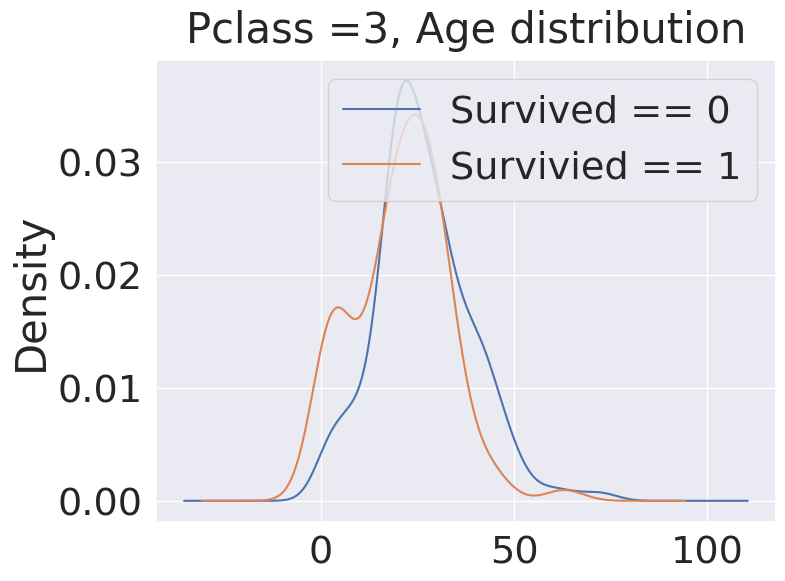

In [23]:
plt.figure(figsize=(8, 6))
df_train[(df_train['Survived']==0) & (df_train['Pclass']==3)]['Age'].plot(kind='kde')
df_train[(df_train['Survived']==1) & (df_train['Pclass']==3)]['Age'].plot(kind='kde')
plt.legend(['Survived == 0', 'Survivied == 1'])
plt.title('Pclass =3, Age distribution', y = 1.02)

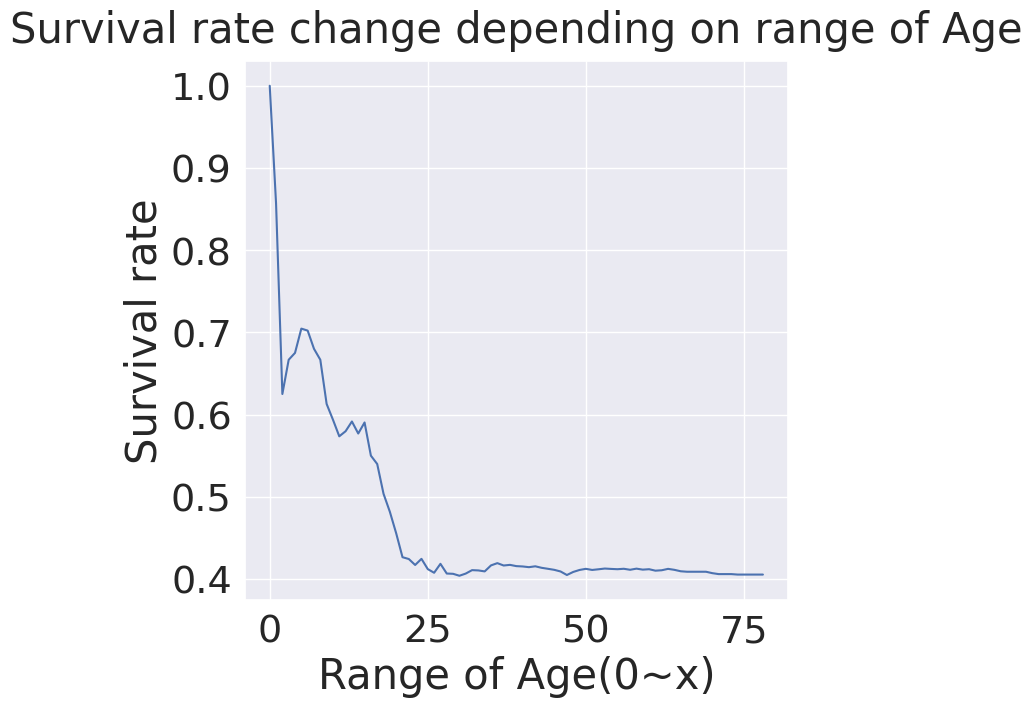

In [24]:
cummulate_survival_ratio = []
for i in range(1, 80):
  cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

Pclass, Sex, Age (Dimension = 3)

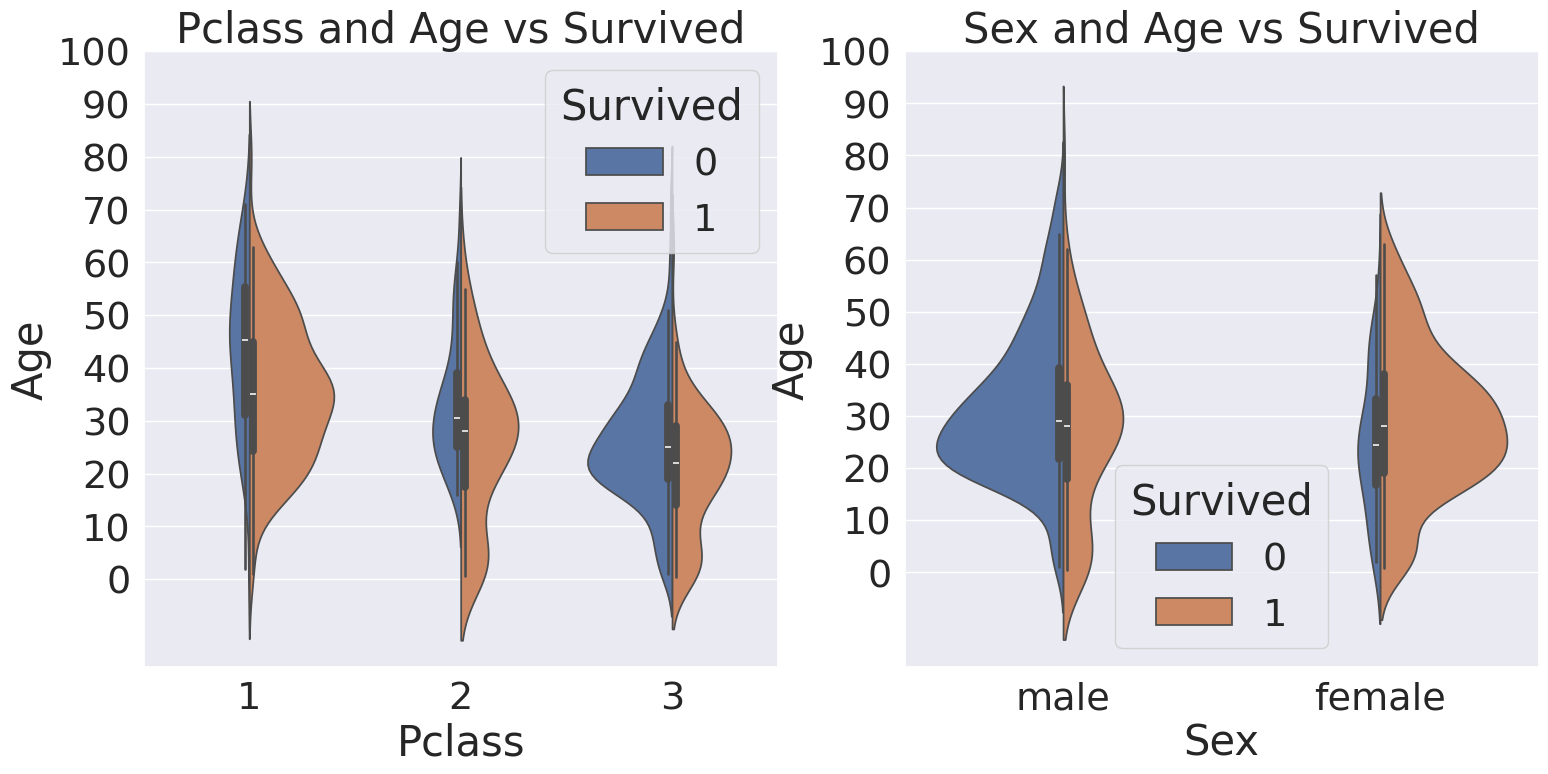

In [25]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) #Set x as a class and y as a distribution
sns.violinplot(x='Pclass', y='Age', hue='Survived', data = df_train, ax=ax[0], split = True, scale = 'count')
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x='Sex', y='Age', hue ='Survived', data= df_train, ax=ax[1], split=True, scale='count')
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

Embarked

<Figure size 700x500 with 0 Axes>

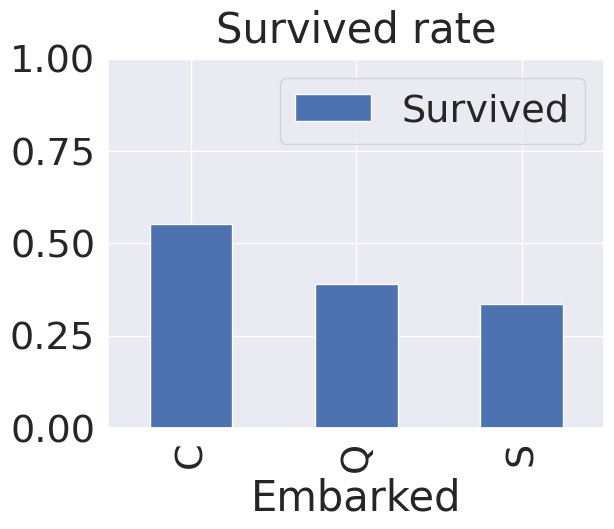

In [26]:
plt.figure(figsize=(7, 5))
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().plot.bar()
plt.title('Survived rate', y = 1.02)
plt.ylim([0,1])
plt.show()

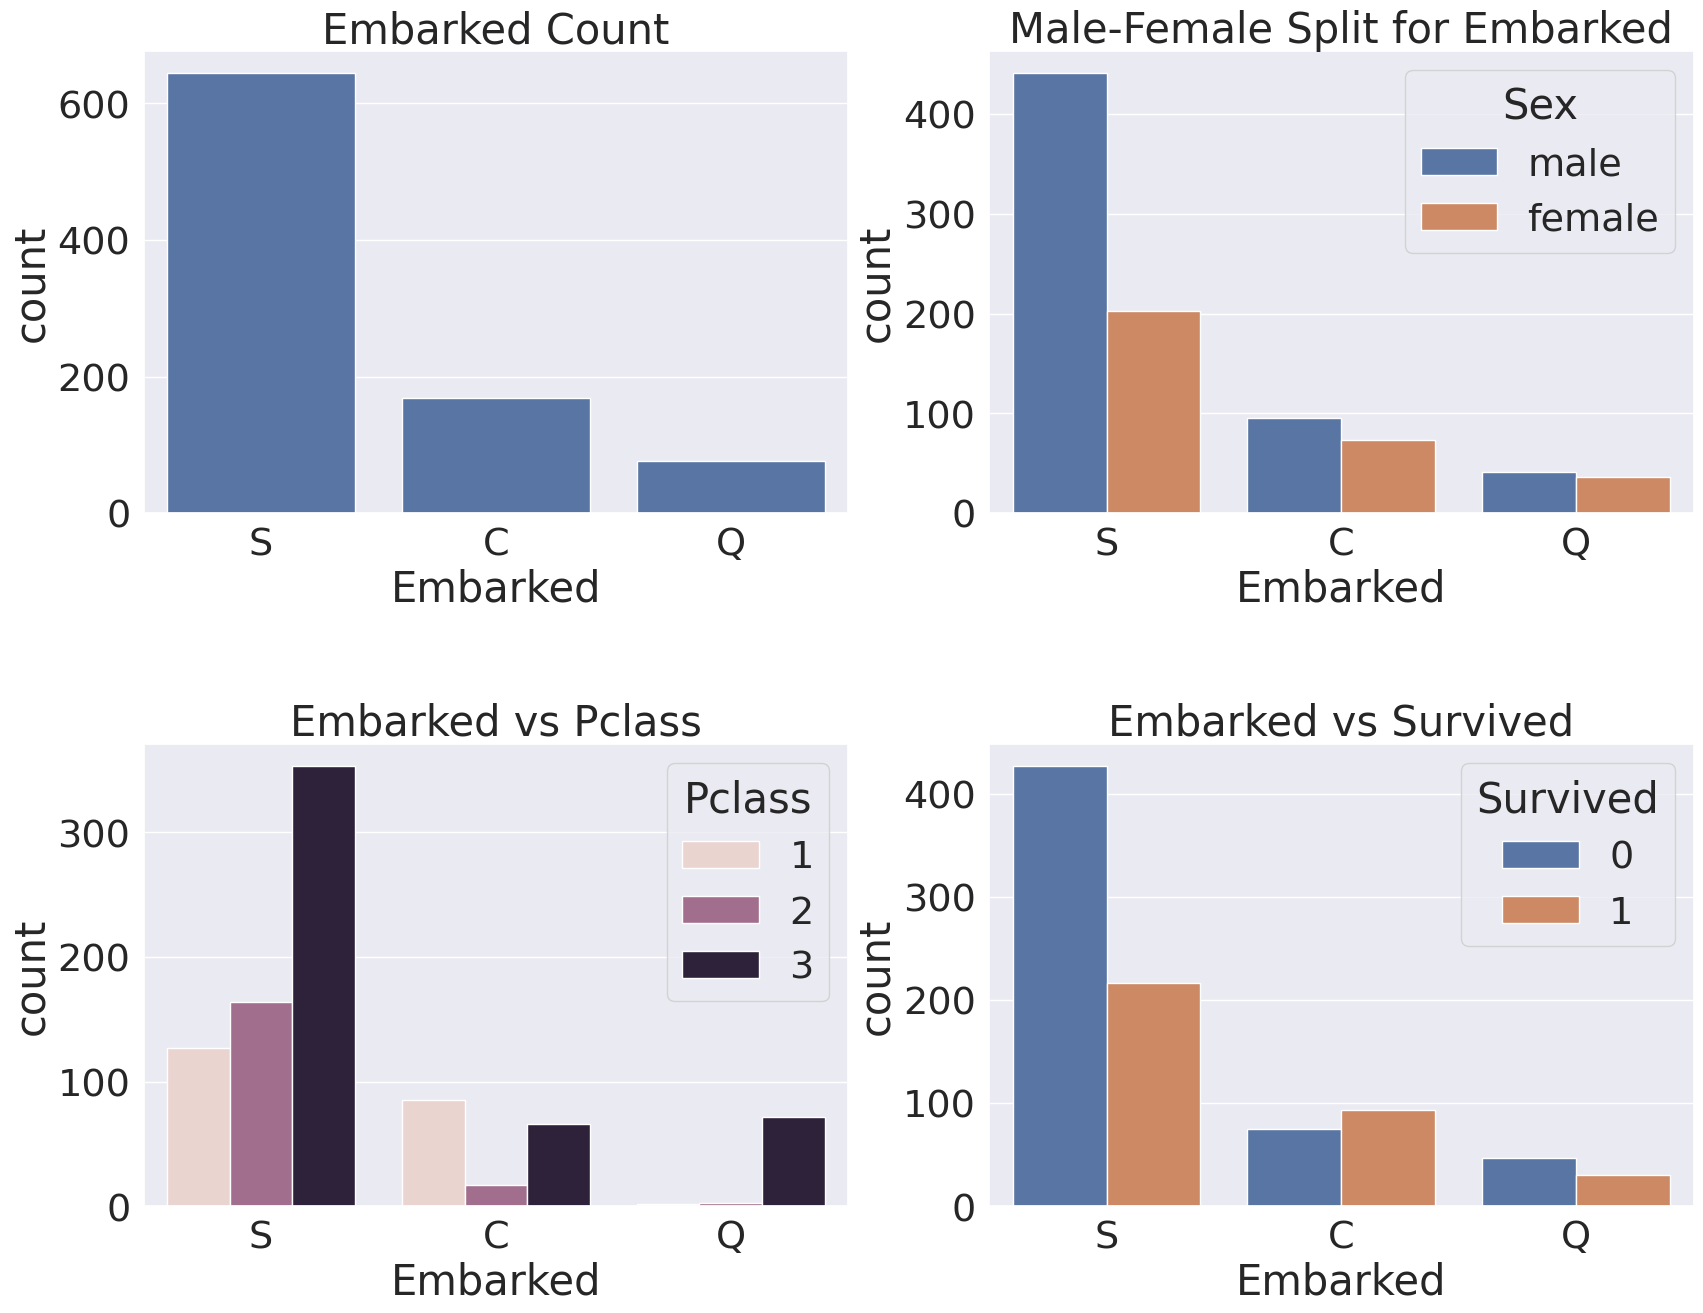

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot(x='Embarked', data = df_train, ax=ax[0,0])
ax[0, 0].set_title('Embarked Count')
sns.countplot(x='Embarked', hue = 'Sex', data = df_train, ax=ax[0,1])
ax[0, 1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue = 'Pclass', data = df_train, ax=ax[1,0])
ax[1, 0].set_title('Embarked vs Pclass')
sns.countplot(x='Embarked', hue = 'Survived', data = df_train, ax=ax[1,1])
ax[1, 1].set_title('Embarked vs Survived')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Family Size

In [28]:
print('Maximum and Minimum size of SibSp is: {} and {}'.format(df_train['SibSp'].max(), df_train['SibSp'].min()))
print('Maximum and Minimum size of Parch is: {} and {}'.format(df_train['Parch'].max(), df_train['Parch'].min()))

Maximum and Minimum size of SibSp is: 8 and 0
Maximum and Minimum size of Parch is: 6 and 0


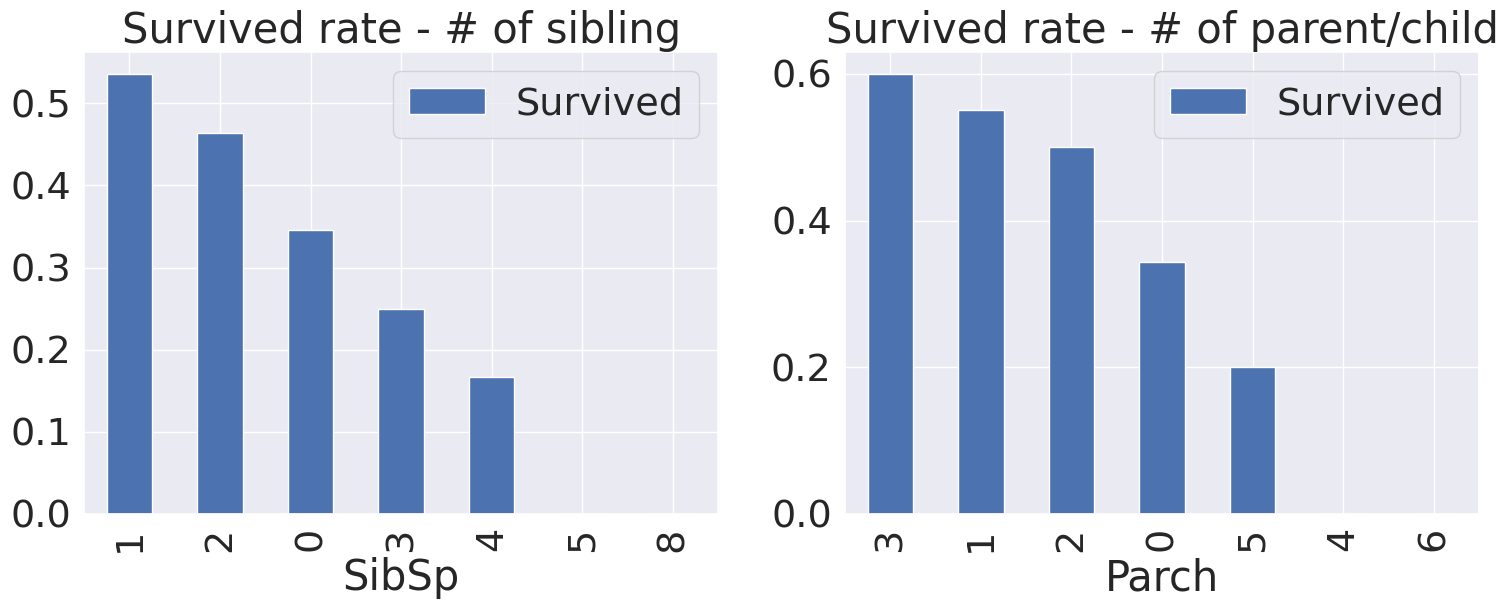

In [29]:
fig, ax = plt.subplots(1,2, figsize=(18, 6))
df_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=True).mean().sort_values(by='Survived', ascending = False).plot.bar(ax=ax[0])
df_train[['Parch', 'Survived']].groupby(['Parch'], as_index=True).mean().sort_values(by='Survived', ascending = False).plot.bar(ax=ax[1])
ax[0].set_title('Survived rate - # of sibling')
ax[1].set_title('Survived rate - # of parent/child')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [30]:
df_train['FamilySize']=df_train['SibSp']+df_train['Parch']+1
df_test['FamilySize']=df_test['SibSp']+df_test['Parch']+1

In [31]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


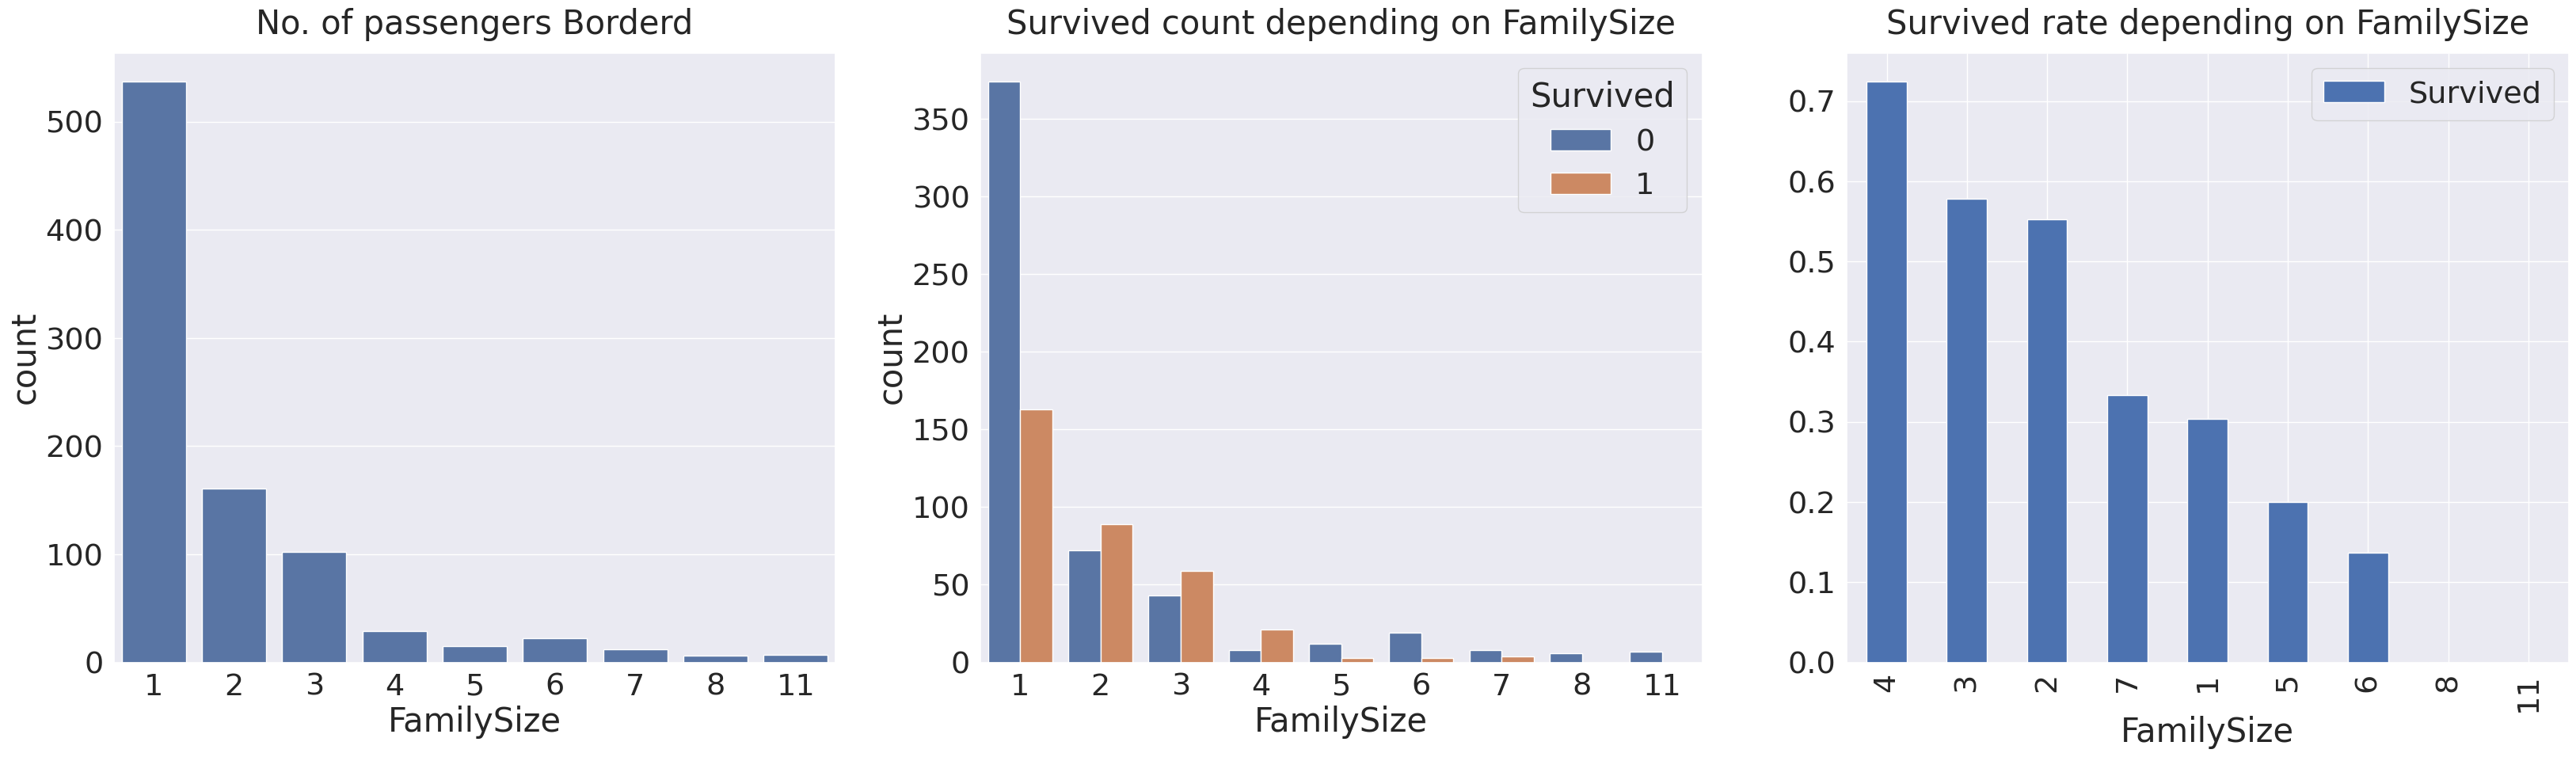

In [32]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
#No. of passengers Borderd
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('No. of passengers Borderd', y=1.02)
#Survived count depending on FamilySize
sns.countplot(x='FamilySize', hue='Survived',data =df_train, ax=ax[1])
ax[1].set_title('Survived count depending on FamilySize', y=1.02)
#Survived rate depending on FamilySize
df_train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending = False).plot.bar(ax=ax[2])
ax[2].set_title('Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Fare

In [33]:
# df_train['Fare']
df_train['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


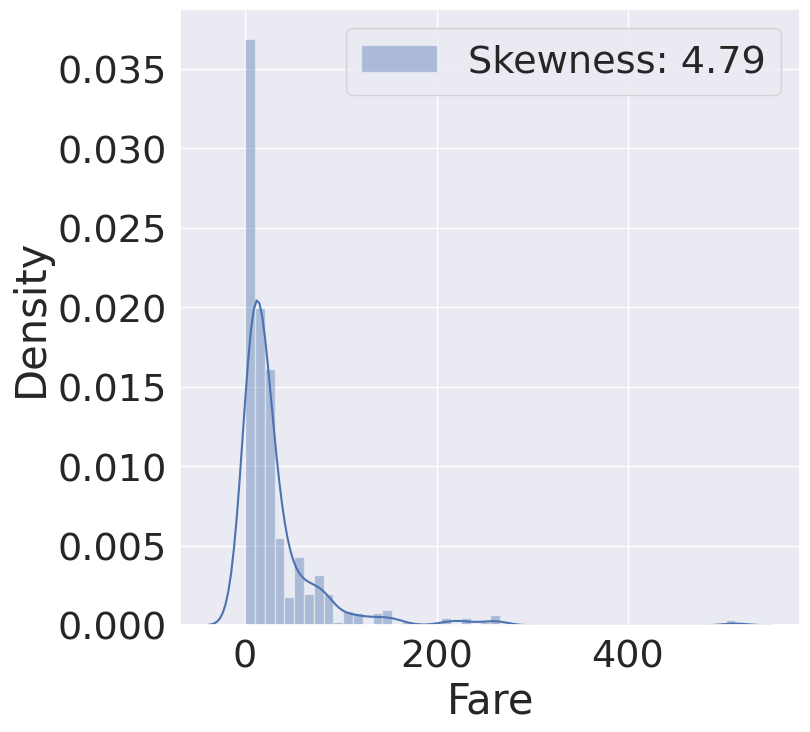

In [34]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

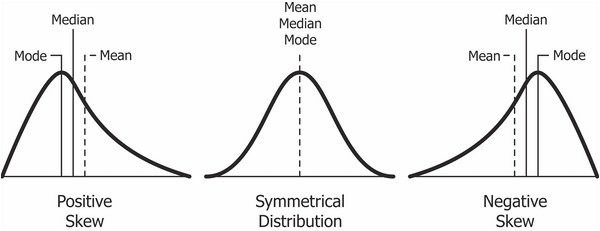

In [35]:
df_test.loc[df_test.Fare.isnull(), 'Fare']=df_test['Fare'].mean()
#replace nan value to mean

df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i>0  else 0)
#map : list -> function -> list
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i>0 else 0)

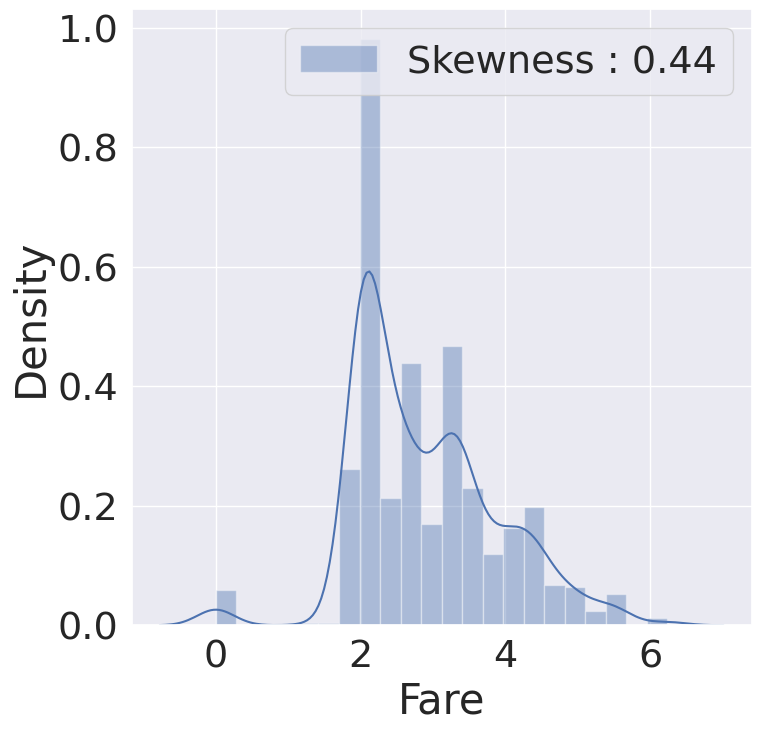

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color = 'b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax = ax )
g = g.legend(loc='best')

In [37]:
df_train['Ticket'].value_counts()

,count
Ticket,
347082,7
CA. 2343,7
1601,7
3101295,6
CA 2144,6
...,...
9234,1
19988,1
2693,1


## Feature Engineering

Fill Null in Age

In [4]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2.5)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

df_train = pd.read_csv('/content/drive/MyDrive/Titanic_dataset/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Titanic_dataset/test.csv')
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i>0  else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

In [7]:
df_train['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


In [9]:
def category_age(x):
  if x<10:
    return 0
  elif x<20:
    return 1
  elif x<30:
    return 2
  elif x<40:
    return 3
  elif x<50:
    return 4
  elif x<60:
    return 5
  elif x<70:
    return 6
  else:
    return 7

In [10]:
df_train['Age_cat'] = df_train['Age'].apply(category_age)

In [13]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,3


In [18]:
df_train['Initial']=df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Initial']=df_test['Name'].str.extract('([A-Za-z]+)\.')

In [21]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [22]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [28]:
# df_train.groupby('Initial').mean()